In [1]:
!pip3 install shap

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394130 sha256=f5bf06af9c28eec794961138a115be1803d51de4620a6d69662d043295096cf3
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [2]:
import shap
from sklearn.model_selection import train_test_split

X, y = shap.datasets.boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
185,0.06047,0.0,2.46,0.0,0.488,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15
101,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67
268,0.54050,20.0,3.97,0.0,0.575,7.470,52.6,2.8720,5.0,264.0,13.0,390.30,3.16
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04


Text(0, 0.5, 'MEDV \n Price $1,000')

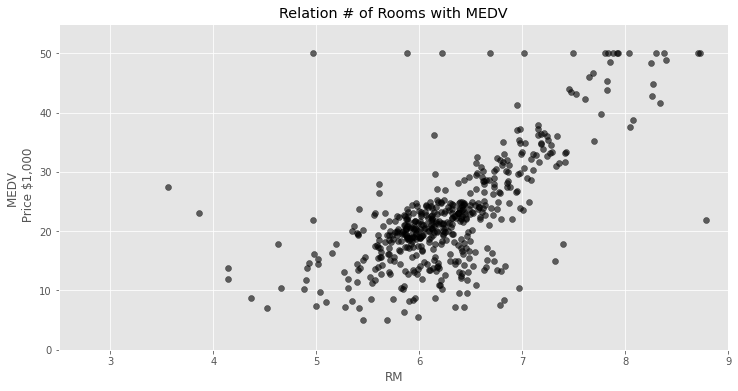

In [3]:
# drawing scatter plot
import matplotlib.pylab as plt
import matplotlib

%matplotlib inline

matplotlib.style.use('ggplot')

fig, ax1 = plt.subplots(1,1, figsize = (12,6))

ax1.scatter(X['RM'], y, color='black', alpha=0.6)
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')

In [4]:
from sklearn import linear_model
import pandas as pd

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(X_train['RM']), y=y_train)
prediction = linear_regression.predict(X=pd.DataFrame(X_test['RM']))

print('a value: ', linear_regression.intercept_)
print('b value: ', linear_regression.coef_)
print('MEDV = {:.2f} * RM {:.2f}'.format(linear_regression.coef_[0], linear_regression.intercept_))

a value:  -32.39552264560753
b value:  [8.76050748]
MEDV = 8.76 * RM -32.40


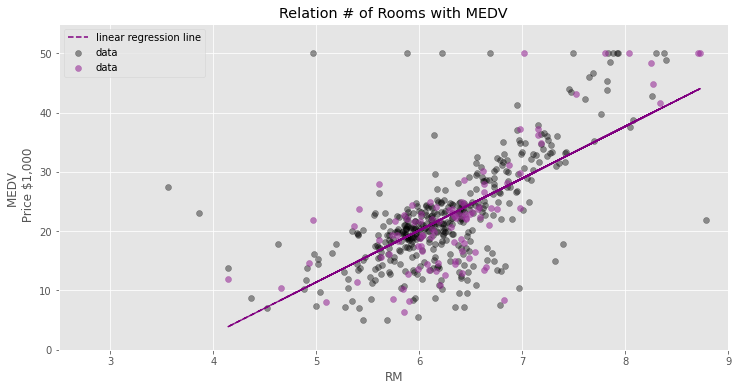

In [5]:
# scatter Train, Test data with Linear Regression Prediction
fig, ax1 = plt.subplots(1,1, figsize = (12,6))
ax1.scatter(X_train['RM'], y_train, color='black', alpha=0.4, label='data')
ax1.scatter(X_test['RM'], y_test, color='#993299', alpha=0.6, label='data')
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')
ax1.plot(X_test['RM'], prediction, color='purple', alpha=1, linestyle='--', label='linear regression line')
ax1.legend()


In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np


rmse = np.sqrt(mean_squared_error(y_test, prediction))
print("RMSE: %f" % (rmse))

RMSE: 6.383135


In [8]:
import xgboost

# train XGBoost model
model = xgboost.XGBRegressor(objective ='reg:linear')
model.fit(X_train, y_train)
preds = model.predict(X_test)

[08:54:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [9]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2.818447


In [10]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
# (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Text(0, 0.5, 'MEDV \n Price $1,000')

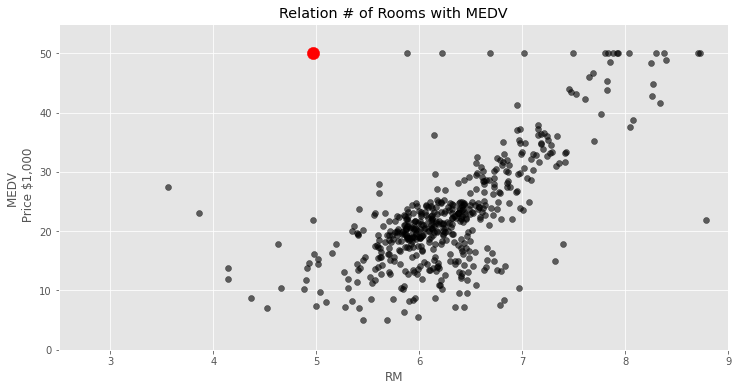

In [11]:
fig, ax1 = plt.subplots(1,1, figsize = (12,6))

idx = 259
ax1.scatter(X['RM'], y, color='black', alpha=0.6)
ax1.scatter(X_train['RM'].iloc[idx], y_train[idx], c='red', s=150)
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')

In [12]:
# load JS visualization code to notebook
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[259,:], X_train.iloc[259,:])

In [13]:
# load JS visualization code to notebook
shap.initjs()

# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

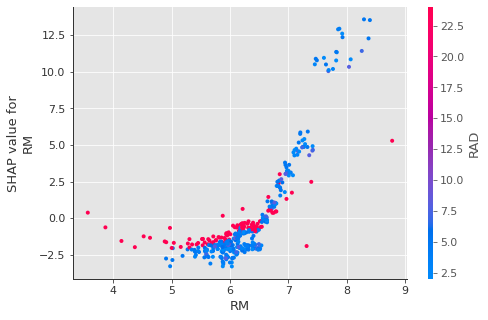

In [14]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X_train)

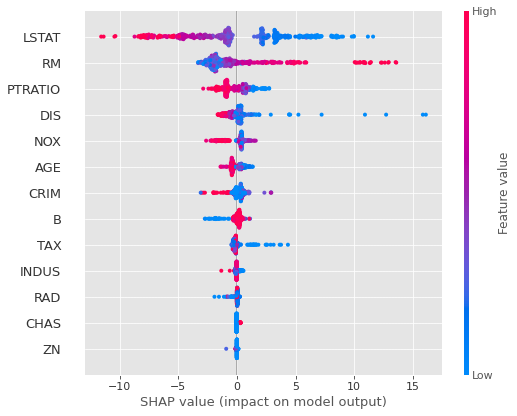

In [15]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

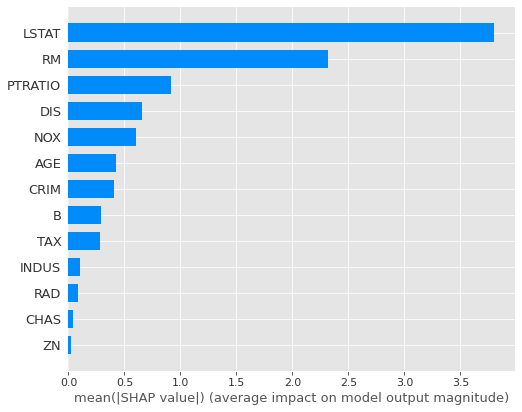

In [16]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

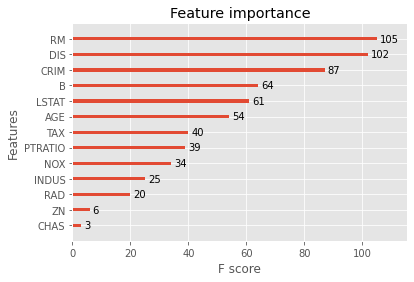

In [17]:
xgboost.plot_importance(model)